<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-checo0228/blob/main/Sergio_MonteCarlo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sergio Eduardo López Lázaro - Monte Carlo Markov Chain Metropolis algorithm



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


In [7]:
# Especifica el archivo de datos y el delimitador (; en este caso)
archivo_datos = 'Wine Quality Dataset.txt'
delimitador = ';'

# Carga los datos excluyendo la primera fila
data = np.loadtxt(archivo_datos, delimiter=delimitador, skiprows=1)

# Ahora puedes acceder a las columnas de datos como desees
# Por ejemplo, para cargar la primera y la segunda columna en x e y:
x = data[:, 0]  # Cargar la primera columna en x
y = data[:, 1]  # Cargar la segunda columna en y


In [8]:

X = np.vstack((np.ones_like(x),x)).T
X.shape


(4898, 2)

In [9]:

def lineal (X, w):
  # x,y,w deben ser arreglos de numpy
  w = np.array(w)
  return X@w

In [16]:
def logaritmo (y, x, w, model = lineal): #lo definimos de esta manera para no usar ciclos for para la sumatoria
  log = (y - model(x,w))**2
  log = np.sum(log)
  return log

def Prior(w, w_max, w_min):
    if w_min <= w <= w_max:
        return 1.0  # Prior uniforme dentro del rango
    else:
        return 0.0  # Prior igual a cero fuera del rango



In [12]:
def MonteCarlo (x, y, w_inter, iter, sigma = 0.1, model = lineal, log = logaritmo):
  # Definimos el parámetro inicial
  theta_ini = [0,0]
  w0 = float(input('Indica el w0:'))
  theta_ini[0] = w0
  w1 = float(input('Indica el w1:'))
  theta_ini[1] = w1


  thetas = []

  i = 0
  while i < iter:
    # Generamos la propuesta
    theta_prop = [np.random.normal(theta_ini[0], sigma), np.random.normal(theta_ini[1], sigma)]

    log_ini = logaritmo(y, x, theta_ini) + np.log(Prior(theta_ini, w_inter[0], w_inter[1]))
    log_prop = logaritmo(y, x, theta_prop) + np.log(Prior(theta_prop, w_inter[0], w_inter[1]))

    if log_prop > log_ini:
      thetas.append(theta_prop)
      theta_ini = theta_prop
    else:
      thetas.append(theta_ini)

    if log_prop == log_ini:
      thetas.append(theta_prop)
      theta_ini = theta_prop
    else:
      thetas.append(theta_ini)
    i +=1

  return np.array(thetas)

Indica el w0:100
Indica el w1:-5


<ipython-input-12-309cb6ef0df9>:17: RuntimeWarning: divide by zero encountered in log
  log_ini = logaritmo(y, x, theta_ini) + np.log(Prior(theta_ini, w_inter[0], w_inter[1]))
<ipython-input-12-309cb6ef0df9>:18: RuntimeWarning: divide by zero encountered in log
  log_prop = logaritmo(y, x, theta_prop) + np.log(Prior(theta_prop, w_inter[0], w_inter[1]))


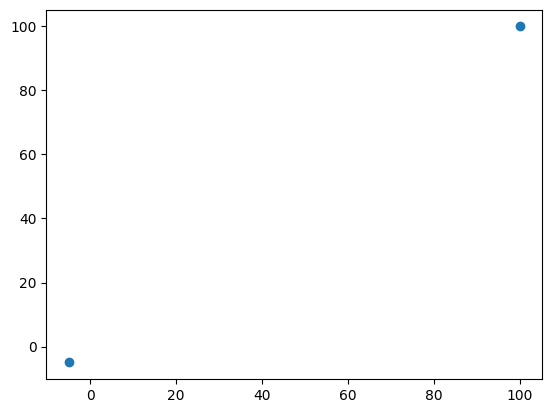

In [17]:
w_inter = [[50, 1], [20, -1]]
chain = MonteCarlo(X, y, w_inter, iter = 10000, sigma = 0.05)

w0s = chain[0].T
w1s = chain[1].T

plt.scatter(w0s, w1s)